# Visualizing the Titanic Disaster

### Instructions

* The goal of this workbook is to get used to importing and manipulating pandas DataFrames.
* Some of the code blocks below are missing parts of the code. The missing parts are indicated by `____`. You need to fill in the correct function or variable name to complete the prompt for that step.
    - For example, in Step 3, the prompt is to view the first 10 entries in the table. The code block is: `titanic._____(10)`. 
    - The solution to this code is `titanic.head(10)`. You should type in `head` where the `____` is originally and execute the code bock.
* You have completed this assignment when you have filled in all of the blanks and executed the entire notebook successfully.

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Step 2. Download the dataset 
1. Open the [titanic dataset](https://github.com/rlowd/python-bigdata/blob/master/pandas-exercises/data/titanic-dataset.txt) in new window.
2. Click the "Raw" button at the top right.
3. Right-click and "Save As..." to the same folder as your jupyter notebook.
![Click the "Raw" button](../../images/click-raw-button.png)
![Right click and "Save As..."](../../images/click-save-as.png)

### Step 3. Assign it to a variable titanic 

In [2]:
titanic = pd.read_csv('data/titanic-dataset.csv')

### View the first 10 entries

In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Step 4. Set PassengerId as the index 

In [4]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [6]:
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

proportions

[577, 314]

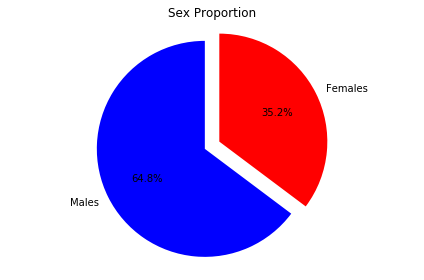

In [5]:
# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

(-5, 85)

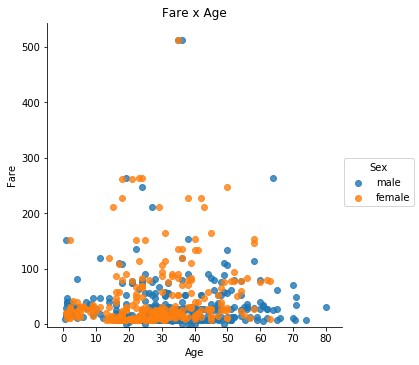

In [6]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [7]:
titanic.Survived.sum()

342

### Step 8. Create a histogram with the Fare payed

In [7]:
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590])

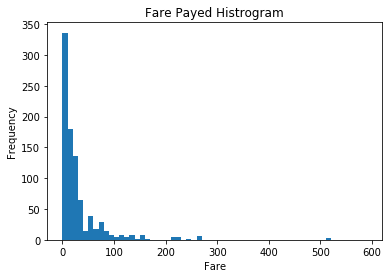

In [8]:
# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

### BONUS: Create your own question and answer it.